# Anomalía de precipitación mensual

In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

## Cargar datos preprocesado

In [2]:
ds = xr.open_dataset("./data/processed/peru.nc")

In [3]:
ds

<xarray.Dataset>
Dimensions:                 (nlat: 85, nlon: 63, time: 242)
Coordinates:
  * nlon                    (nlon) float32 -82.375 -82.125 -81.875 -81.625 ...
  * nlat                    (nlat) float32 -20.125 -19.875 -19.625 -19.375 ...
  * time                    (time) datetime64[ns] 1998-01-31 1998-02-28 ...
Data variables:
    precipitation           (time, nlat, nlon) float32 ...
    relativeError           (time, nlat, nlon) float32 ...
    gaugeRelativeWeighting  (time, nlat, nlon) int32 ...
Attributes:
    Grid.GridHeader:  BinMethod=ARITHMETIC_MEAN;\nRegistration=CENTER;\nLatit...
    FileHeader:       AlgorithmID=3B43;\nAlgorithmVersion=3B43_7.0;\nFileName...
    FileInfo:         DataFormatVersion=m;\nTKCodeBuildVersion=1;\nMetadataVe...
    GridHeader:       BinMethod=ARITHMETIC_MEAN;\nRegistration=CENTER;\nLatit...
    history:          2018-05-14 14:20:38 GMT Hyrax-1.13.4 https://disc2.gesd...

## Generar series mensuales promedio

In [4]:
ds_month = ds["precipitation"].groupby('time.month').mean(dim='time')
ds_month

<xarray.DataArray 'precipitation' (month: 12, nlat: 85, nlon: 63)>
array([[[  1.297143,   1.457143, ...,  43.191708,  47.378128],
        [  1.084285,   1.295714, ...,  60.64509 ,  51.932518],
        ...,
        [ 49.34143 ,  51.328568, ..., 284.6647  , 275.8193  ],
        [ 59.481434,  61.74571 , ..., 272.80167 , 253.78284 ]],

       [[  1.191067,   0.903012, ...,  31.80134 ,  39.663967],
        [  1.05744 ,   1.208337, ...,  40.742138,  46.45229 ],
        ...,
        [ 86.32718 ,  95.11156 , ..., 297.83685 , 307.89328 ],
        [ 83.09269 ,  93.618515, ..., 292.94763 , 289.67758 ]],

       ...,

       [[  0.471038,   0.336038, ...,  10.407618,   5.985348],
        [  0.559538,   0.370538, ...,  11.813972,   6.803656],
        ...,
        [  8.311501,   8.346   , ..., 226.20822 , 211.10799 ],
        [  9.336   ,   9.430499, ..., 231.87712 , 210.19304 ]],

       [[  0.8415  ,   0.822073, ...,  13.37858 ,  14.824428],
        [  1.383   ,   1.189524, ...,  24.304808,  22.00

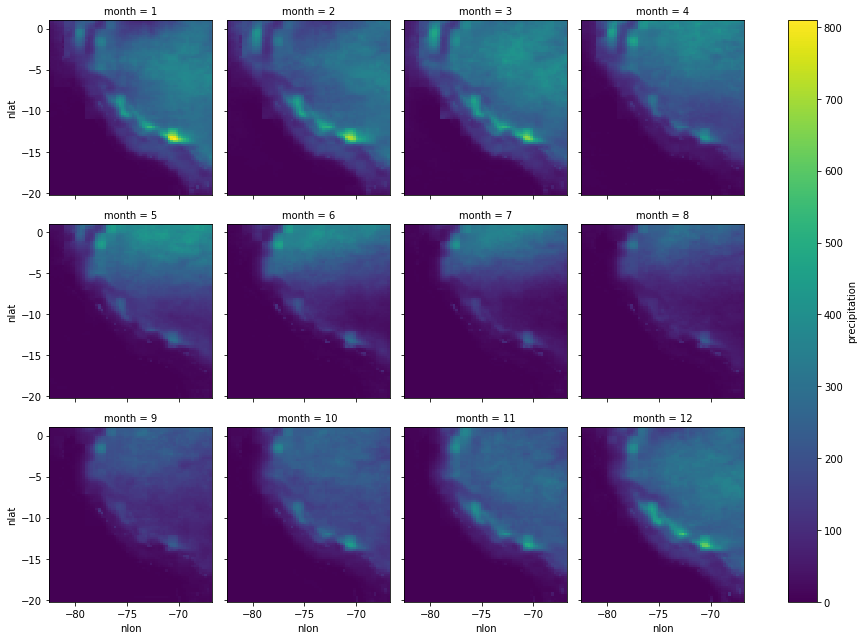

In [5]:
ds_month.plot(x='nlon', y='nlat', col='month', col_wrap=4)

### Gráfico enhajado usando cartopy

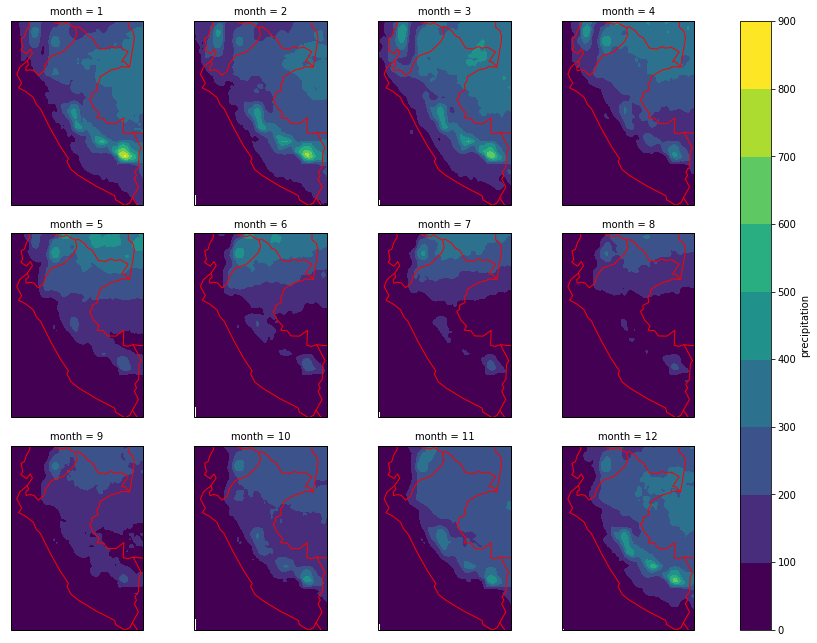

In [6]:
p = ds_month.plot.contourf(x='nlon', y='nlat', col='month', col_wrap=4, transform=ccrs.PlateCarree(), 
               subplot_kws={'projection': ccrs.Orthographic(-70,-15)}, #figsize=(10,10), 
                           levels=np.arange(0, 1000, 100))

for ax in p.axes.flat:
    ax.coastlines(color="red")
    ax.add_feature(cartopy.feature.BORDERS, edgecolor="red")
    #ax.gridlines()
    ax.set_extent([-82, -68.5, 0.5, -18]); #x0, x1, y0, y1 

## Anomalía mensual

In [7]:
ds_month

<xarray.DataArray 'precipitation' (month: 12, nlat: 85, nlon: 63)>
array([[[  1.297143,   1.457143, ...,  43.191708,  47.378128],
        [  1.084285,   1.295714, ...,  60.64509 ,  51.932518],
        ...,
        [ 49.34143 ,  51.328568, ..., 284.6647  , 275.8193  ],
        [ 59.481434,  61.74571 , ..., 272.80167 , 253.78284 ]],

       [[  1.191067,   0.903012, ...,  31.80134 ,  39.663967],
        [  1.05744 ,   1.208337, ...,  40.742138,  46.45229 ],
        ...,
        [ 86.32718 ,  95.11156 , ..., 297.83685 , 307.89328 ],
        [ 83.09269 ,  93.618515, ..., 292.94763 , 289.67758 ]],

       ...,

       [[  0.471038,   0.336038, ...,  10.407618,   5.985348],
        [  0.559538,   0.370538, ...,  11.813972,   6.803656],
        ...,
        [  8.311501,   8.346   , ..., 226.20822 , 211.10799 ],
        [  9.336   ,   9.430499, ..., 231.87712 , 210.19304 ]],

       [[  0.8415  ,   0.822073, ...,  13.37858 ,  14.824428],
        [  1.383   ,   1.189524, ...,  24.304808,  22.00

In [8]:
ds_monthly_anomaly = ds["precipitation"].groupby('time.month') - ds_month

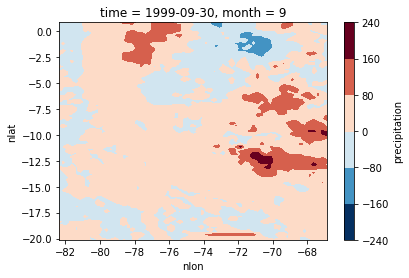

In [9]:
ds_monthly_anomaly.sel(time=ds_monthly_anomaly.time[20]).plot.contourf();

## Guardar el objeto en el disco como archivo `.nc` ([netcdf](https://en.wikipedia.org/wiki/NetCDF))

In [10]:
ds_monthly_anomaly.to_netcdf("./data/processed/peru_anomaly.nc")